In [1]:

# Import packages
import os
import numpy as np
import matplotlib.pyplot as plt

# Analytics/Metrics
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
from wordcloud import WordCloud

# Colormap
import matplotlib.colors

In [2]:
# variables

#=========================#
# data
#=========================#

# Input data filepath
RAW_DIRNAME = "C:\\Users\\hlmq\\OneDrive - Chevron\\Desktop\\Projects\\macop_training\\"
# Input data
filename = "uci-news-aggregator.csv"


#=========================#
# wordcloud params
#=========================#

# Field with text to generate wordcloud
TEXT_FIELD = "TITLE"
# Output filepath for wordcloud
WORDCLOUD_OUTPUT_FILEPATH = "C:\\Users\\hlmq\\OneDrive - Chevron\\Desktop\\Projects\\macop_training\\wordclouds\\news.png"

In [14]:
df = pd.read_csv(str(RAW_DIRNAME)+str(filename))

In [15]:
len(df)

422419

In [16]:
df.head()

,ID,TITLE,URL,PUBLISHER,CATEGORY,STORY,HOSTNAME,TIMESTAMP
0,1,"Fed official says weak data caused by weather,...",http://www.latimes.com/business/money/la-fi-mo...,Los Angeles Times,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.latimes.com,1394470370698
1,2,Fed's Charles Plosser sees high bar for change...,http://www.livemint.com/Politics/H2EvwJSK2VE6O...,Livemint,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.livemint.com,1394470371207
2,3,US open: Stocks fall after Fed official hints ...,http://www.ifamagazine.com/news/us-open-stocks...,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,1394470371550
3,4,"Fed risks falling 'behind the curve', Charles ...",http://www.ifamagazine.com/news/fed-risks-fall...,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,1394470371793
4,5,Fed's Plosser: Nasty Weather Has Curbed Job Gr...,http://www.moneynews.com/Economy/federal-reser...,Moneynews,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.moneynews.com,1394470372027


In [17]:
df['CATEGORY'].value_counts()

e    152469
b    115967
t    108344
m     45639
Name: CATEGORY, dtype: int64

## Word Frequencies

In [ ]:
# Custom data to create a word cloud
words_list = ['embedding', 'language model', 'semantic', 'token', 'words', 'meaning', 'doc2vec', 'word2vec', 'fasttext', 'gpt', 'learning', 'search', 'similarity']
frequency_list = [55,10,33,20,12, 26, 30, 30, 30, 15, 20, 20, 20]

WordFreq = pd.DataFrame()

WordFreq['Word'] = words_list
WordFreq['Frequency'] = frequency_list

Text(0.5, 1.0, 'Most Common Words')

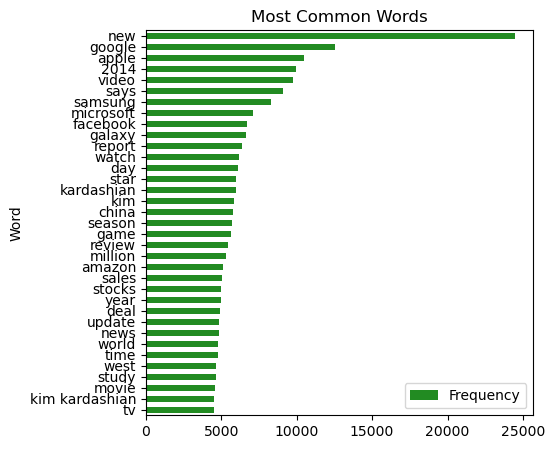

In [4]:
# When using data from a pandas df
#Create DTM
cv = CountVectorizer(ngram_range = (1,3), stop_words='english')
dtm = cv.fit_transform(df[TEXT_FIELD])
words = np.array(cv.get_feature_names_out())

#Look at top N most frequent words
freqs=dtm.sum(axis=0).A.flatten()
index=np.argsort(freqs)[-35:]

# Construct dataframe
WordFreq = pd.DataFrame.from_records(list(zip(words[index], freqs[index])))
WordFreq.columns = ['Word', 'Frequency']

# Plot horizontal bar graph
fig, ax = plt.subplots(figsize=(5, 5))
WordFreq.sort_values(by='Frequency').plot.barh(
                      x='Word',
                      y='Frequency',
                      ax=ax,
                      color="forestgreen")

# COLORS: darkred, goldenrod, forestgreen, deepskyblue, rebeccapurple

plt.title(f"Most Common Words")

## Generate Word Cloud

### Assign a color map

In [5]:
# Create the custom color map
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["#111D45", "#0B2D71", "#064A91", "#0066B2", "#0081C5"])


# List of "Chevron" blue colors
# ["#111D45", "#0B2D71", "#064A91", "#0066B2", "#0081C5"]

# List of Red/Orange/Yellow colors
# ["#740001", "#ae0001", "#eeba30", "#d3a625", "#000000"]



In [21]:
# Multiply a word by the number of times it is seen in the corpus

GLOBAL_STRING = ""
for i in range(0, len(WordFreq)):
    string = WordFreq['Word'][i]
    number_of_times = WordFreq['Frequency'][i]
    for i in range(0,number_of_times):
        GLOBAL_STRING += string + " "

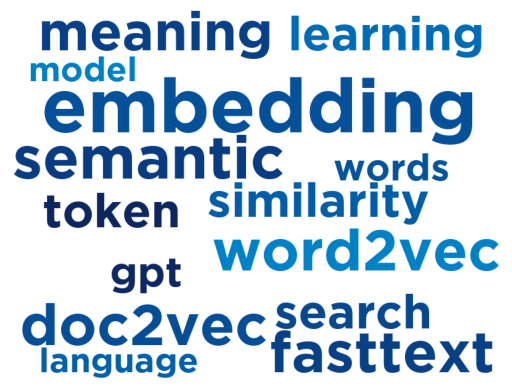

In [22]:
# Generate Word Cloud
wc = WordCloud(background_color='white', 
               font_path = "Gotham-Bold.otf",
               contour_width = 2,
               width = 800, 
               height = 600,
               collocations=False,
               colormap = cmap).generate(GLOBAL_STRING)
plt.axis("off")
plt.imshow(wc)

In [25]:
# Save word cloud to file
wc.to_file(WORDCLOUD_OUTPUT_FILEPATH)

In [13]:
len(df)

422419